<a href="https://colab.research.google.com/github/Leejungs/2024-1-my-BDA/blob/main/05w_0403_Wed_A_ch06_dataframe_group_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##파이썬 설치확인

In [15]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [16]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns

print(sys.version)
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.25.2
2.0.3
0.13.1


In [17]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 24.3 MB/s eta 0:00:00


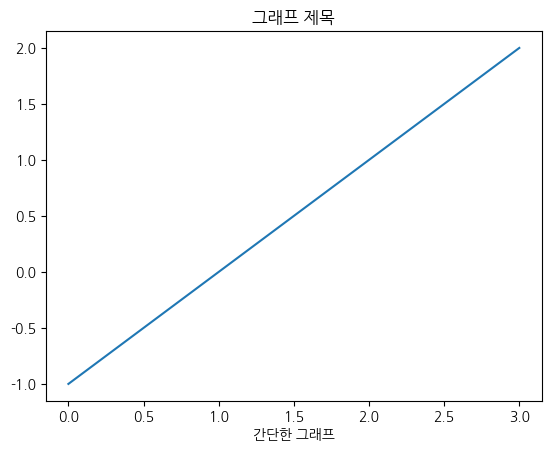

In [18]:
# 데이터프레임의 소수점 이하 n자리 출력 설정
pd.set_option('display.precision', 2)

import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-1, 0 , 1 ,2])
plt.title('그래프 제목')
plt.xlabel('간단한 그래프')
plt.show()

In [19]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 5.90 MiB/s, done.


In [20]:
import pandas as pd

exam=pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [21]:
exam.agg("mean")

id         10.50
nclass      3.00
math       57.45
english    84.90
science    59.45
dtype: float64

In [22]:
exam.agg(["mean", "max", "min", "median"]) #median은 중간값/ 시리즈임

,id,nclass,math,english,science
mean,10.5,3.0,57.45,84.9,59.45
max,20.0,5.0,90.00,98.0,98.00
min,1.0,1.0,20.00,56.0,12.00
median,10.5,3.0,54.00,86.5,62.50


In [23]:
exam.mean()

id         10.50
nclass      3.00
math       57.45
english    84.90
science    59.45
dtype: float64

In [24]:
exam.agg(mean_math = ('math', 'mean'))#math에대해서만 mean_math를 알려줌
                                      # math의 평균값을 알려준거임.

,math
mean_math,57.45


In [25]:
import numpy as np                           #시험문제
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, 10]],
                   columns=['A', 'B', 'C'])
df
#columns는 제목 A,B,C
#짝수일때는 6과 9의 평균값인 7.5가 중간값임!

,A,B,C
0,1.0,2.0,3
1,4.0,5.0,6
2,7.0,8.0,9
3,NaN,NaN,10


In [26]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'])

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0
count,3.0,3.0,4.0


In [27]:
df.agg(['sum', 'mean', 'median', 'min', 'max'], axis=0)

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0


In [28]:
df.agg(['sum', 'mean', 'median', 'min', 'max'], axis='columns') #index와 columns 같다
#(***)

,sum,mean,median,min,max
0,6.0,2.0,2.0,1.0,3.0
1,15.0,5.0,5.0,4.0,6.0
2,24.0,8.0,8.0,7.0,9.0
3,10.0,10.0,10.0,10.0,10.0


In [29]:
df.agg(['sum', 'mean', 'median', 'min', 'max'], axis=1)
# 행에 대한 정보를 보여줌

,sum,mean,median,min,max
0,6.0,2.0,2.0,1.0,3.0
1,15.0,5.0,5.0,4.0,6.0
2,24.0,8.0,8.0,7.0,9.0
3,10.0,10.0,10.0,10.0,10.0


##집단별 요약 통계량 구하기

In [30]:
exam.tail()
#범주형 -> n가지중에 하나 (nclass)

,id,nclass,math,english,science
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [31]:
exam.groupby('nclass').agg(mean_math = ('math', 'mean'))
#반으로 나눠서 math의 평균을 나눔/ nclass를 했기때문에 index로되었음

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [32]:
exam.groupby('nclass').agg(max_math = ('math', 'max'))
#max로 하면 반별로 최고점수값을 구해주는거

,max_math
nclass,
1,60
2,90
3,65
4,75
5,89


In [33]:
exam.groupby('nclass').mean() #자료형은 DataFrame

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [34]:
exam.groupby('nclass').mean()[["math", "english", "science"]]
# columns math하나만 빼고싶으면 (시리즈임)

,math,english,science
nclass,,,
1,46.25,94.75,61.50
2,61.25,84.25,58.25
3,45.00,86.50,39.25
4,56.75,84.75,55.00
5,78.00,74.25,83.25


In [35]:
exam.groupby('nclass').min()
#최솟값

,id,math,english,science
nclass,,,,
1,1,30,86,50
2,5,25,78,25
3,9,20,65,15
4,13,46,56,12
5,17,65,68,58


In [36]:
exam.groupby('nclass').agg("mean")
#agg는 좀 더 다양한기능을 넣을 수 있음

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [37]:
exam.groupby('nclass').agg(["mean", "median"])
#id / math/ english / science가 위에있고 , 밑에 agg의 mean과 median이 있음.

id          math        english        science       
        mean median   mean median    mean median    mean median
nclass                                                         
1        2.5    2.5  46.25   47.5   94.75   97.5   61.50   59.0
2        6.5    6.5  61.25   65.0   84.25   84.5   58.25   55.0
3       10.5   10.5  45.00   47.5   86.50   91.5   39.25   38.5
4       14.5   14.5  56.75   53.0   84.75   92.5   55.00   65.0
5       18.5   18.5  78.00   79.0   74.25   73.0   83.25   88.5

In [38]:
#인자 사용 방법: 열 이름은 키워드인 반면, 값('열명', '함수명')은 열에서 값을 계산하는데 사용되는 함수 이름
#새_열이름 = ('열명', '함수명')
exam.groupby('nclass').agg(meanMath = ('math', 'mean'))

,meanMath
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [39]:
exam.groupby('nclass').agg(meanMath = ('math', 'mean'), meanEng = ('english', 'mean'))

,meanMath,meanEng
nclass,,
1,46.25,94.75
2,61.25,84.25
3,45.00,86.50
4,56.75,84.75
5,78.00,74.25


In [40]:
#인자 사용 방법: 사전 형식
#{'열명', '함수명'}
exam.groupby('nclass').agg(({'math': 'mean'}))

,math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [41]:
# dict of axis labels -> fuctions, fuction names or list of such.
# {'열명': ['함수명1', '함수명2', ....]}
exam.groupby('nclass').agg({'math': ['mean', 'min', 'max']})

math        
         mean min max
nclass               
1       46.25  30  60
2       61.25  25  90
3       45.00  20  65
4       56.75  46  75
5       78.00  65  89

##(알아두면 좋아요)변수를 인덱스로 바꾸지 않기

In [42]:
exam.groupby('nclass', as_index=False).agg(mean_math = ('math', 'mean'))

,nclass,mean_math
0,1,46.25
1,2,61.25
2,3,45.00
3,4,56.75
4,5,78.00


##DataFrameGroupBy 객체

In [43]:
exam.groupby('nclass')

In [44]:
type(exam.groupby('nclass'))

pandas.core.groupby.generic.DataFrameGroupBy

In [45]:
range(10)

range(0, 10)

In [46]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [47]:
exam_gb = exam.groupby('nclass')
exam_gb

In [48]:
list(exam_gb) #1반만 DataFrame.. 2반만 모아놓은 DataFrame~
#이 형태가 DataFrame groupby다.

[(1,
     id  nclass  math  english  science
  0   1       1    50       98       50
  1   2       1    60       97       60
  2   3       1    45       86       78
  3   4       1    30       98       58),
 (2,
     id  nclass  math  english  science
  4   5       2    25       80       65
  5   6       2    50       89       98
  6   7       2    80       90       45
  7   8       2    90       78       25),
 (3,
      id  nclass  math  english  science
  8    9       3    20       98       15
  9   10       3    50       98       45
  10  11       3    65       65       65
  11  12       3    45       85       32),
 (4,
      id  nclass  math  english  science
  12  13       4    46       98       65
  13  14       4    48       87       12
  14  15       4    75       56       78
  15  16       4    58       98       65),
 (5,
      id  nclass  math  english  science
  16  17       5    65       68       98
  17  18       5    80       78       90
  18  19       5    89       68   

In [49]:
for key, value in exam_gb:
  print(key, '\n')
  print(type(value))
  print(value, '\n', '-'*40, '\n')



1 

<class 'pandas.core.frame.DataFrame'>
   id  nclass  math  english  science
0   1       1    50       98       50
1   2       1    60       97       60
2   3       1    45       86       78
3   4       1    30       98       58 
 ---------------------------------------- 

2 

<class 'pandas.core.frame.DataFrame'>
   id  nclass  math  english  science
4   5       2    25       80       65
5   6       2    50       89       98
6   7       2    80       90       45
7   8       2    90       78       25 
 ---------------------------------------- 

3 

<class 'pandas.core.frame.DataFrame'>
    id  nclass  math  english  science
8    9       3    20       98       15
9   10       3    50       98       45
10  11       3    65       65       65
11  12       3    45       85       32 
 ---------------------------------------- 

4 

<class 'pandas.core.frame.DataFrame'>
    id  nclass  math  english  science
12  13       4    46       98       65
13  14       4    48       87       12
14  1

##여러 요약 통계량 한 번에 구하기

In [61]:
# nclass별로 분리
# 수학 점수 평균
# 수학 점수 합계
# 수학 점수 중앙값
# 반도(학생 수)

In [62]:
exam.groupby('nclass').agg(mean_math    = ('math', 'mean'),
                           sum_math     = ('math', 'sum'),
                           median_math  = ('math', 'median'),
                           count        = ('nclass', 'count'))

,mean_math,sum_math,median_math,count
nclass,,,,
1,46.25,185,47.5,4
2,61.25,245,65.0,4
3,45.00,180,47.5,4
4,56.75,227,53.0,4
5,78.00,312,79.0,4


In [63]:
#exam_groupby('nclass').mean()

In [64]:
#exam_groupby('nclass').agg(['mean', 'median'])

In [65]:
import pandas as pd

mpg = pd.read_csv('data/mpg.csv')
mpg.info()
# (***) mpg 낼생각하심
#제조업체 (columns)
# displ , year(년식), dry(전륜이냐 후륜이냐), cty(도심연비), hwy(고속도로연비), category(suv냐 van이냐 차종임)
#범주형은 Dtype 저거가 범주형 / 범주형이 많기때문에 groupby로 시험문제 내실예정

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [66]:
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'category'],
      dtype='object')

In [67]:
mpg.sample(frac=.02) # f가 front 엔진이 앞이냐 뒤냐 말하는거임 전륜, 후륜, 사륜 그거임

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
83,ford,f150 pickup 4wd,4.2,1999,6,auto(l4),4,14,17,r,pickup
209,volkswagen,gti,2.0,2008,4,manual(m6),f,21,29,p,compact
116,hyundai,tiburon,2.0,1999,4,manual(m5),f,19,29,r,subcompact
80,ford,explorer 4wd,4.0,2008,6,auto(l5),4,13,19,r,suv
97,ford,mustang,4.6,2008,8,auto(l5),r,15,22,r,subcompact


In [68]:
#(***)
# 제조회사 및 구동 방식별 분리
# cty 평균 구하기
mpg.groupby(['manufacturer', 'drv']).agg(mean_cty = ('cty', 'mean')) #시험 예상!

mean_cty
manufacturer drv          
audi         4       16.82
             f       18.86
chevrolet    4       12.50
             f       18.80
             r       14.10
dodge        4       12.00
             f       15.82
ford         4       13.31
             r       14.75
honda        f       24.44
hyundai      f       18.64
jeep         4       13.50
land rover   4       11.50
lincoln      r       11.33
mercury      4       13.25
nissan       4       13.75
             f       20.00
pontiac      f       17.00
subaru       4       19.29
toyota       4       14.93
             f       21.37
volkswagen   f       20.93

In [69]:
# 제조 회사와 차종별 분리
# cty 평균 구하기
# hwy 평균 구하기
mpg.groupby(['manufacturer', 'category']).agg(mean_cty = ('cty', 'mean'), mean_hwy = ('hwy', 'mean'))

mean_cty  mean_hwy
manufacturer category                      
audi         compact        17.93     26.93
             midsize        16.00     24.00
chevrolet    2seater        15.40     24.80
             midsize        18.80     27.60
             suv            12.67     17.11
dodge        minivan        15.82     22.36
             pickup         12.05     16.11
             suv            11.86     16.00
ford         pickup         13.00     16.43
             subcompact     15.89     23.22
             suv            12.89     17.78
honda        subcompact     24.44     32.56
hyundai      midsize        19.00     27.71
             subcompact     18.29     26.00
jeep         suv            13.50     17.62
land rover   suv            11.50     16.50
lincoln      suv            11.33     17.00
mercury      suv            13.25     18.00
nissan       compact        20.00     28.00
             midsize        20.00     27.43
             suv            13.75     18.00
pontiac      midsize        17.00     26.40
subaru       compact        19.75     26.00
             subcompact     19.50     26.00
             suv            18.83     25.00
toyota       compact        22.25     30.58
             midsize        19.86     28.29
             pickup         15.57     19.43
             suv            14.38     18.25
volkswagen   compact        20.79     28.50
             midsize        18.57     27.57
             subcompact     24.00     32.83

In [70]:
## audi의 drv별 빈도

# audi 추출
# drv별 분리
# 빈도 구하기
mpg.query('manufacturer == "audi"').groupby(['drv']).agg(n = ('drv', 'count'))

,n
drv,
4,11
f,7


In [71]:
## chevrolet의 drv별 빈도

# chevrolet 추출
# drv별 분리
# 빈도 구하기
mpg.query('manufacturer == "chevrolet"').groupby(['drv']).agg(n = ('drv', 'count'))

,n
drv,
4,4
f,5
r,10


In [72]:
mpg.query('manufacturer == "chevrolet"').groupby(['drv']).count()
# drv의 갯수 model만 있다하면 밑에 코드처럼!

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,category
drv,,,,,,,,,,
4,4,4,4,4,4,4,4,4,4,4
f,5,5,5,5,5,5,5,5,5,5
r,10,10,10,10,10,10,10,10,10,10


In [73]:
mpg.query('manufacturer == "chevrolet"').groupby(['drv']).count()[['model']]

,model
drv,
4,4
f,5
r,10


In [74]:
mpg.query('manufacturer == "chevrolet"').groupby(['drv']).count()[['model']].rename(columns = {'model' : 'n'})
#rename보단 agg가 편하긴하다!

,n
drv,
4,4
f,5
r,10


#### (알아 두면 좋아요) `value_counts()`로 집단별 빈도 간단하게 구하기

In [75]:
mpg.groupby('drv').agg(n = ('drv', 'count'))

,n
drv,
4,103
f,106
r,25


In [76]:
mpg[['drv', 'cyl']].value_counts() # 이건 시리즈

drv  cyl
f    4      58
4    8      48
f    6      43
4    6      32
     4      23
r    8      21
f    5       4
r    6       4
f    8       1
Name: count, dtype: int64

In [77]:
mpg[['drv', 'cyl']].value_counts().to_frame() #이건 데이터프레임 코드
#drv와 cyl를 나눴을떄 행이 몇개냐하는코드임

count
drv cyl       
f   4       58
4   8       48
f   6       43
4   6       32
    4       23
r   8       21
f   5        4
r   6        4
f   8        1

In [78]:
#mpg['drv'].value_counts().query('n > 100') # 오류 발생

In [79]:
mpg['drv'].value_counts().to_frame('n > 100') # 오류 발생

,n > 100
drv,
f,106
4,103
r,25


In [80]:
# drv 빈도 구하기
# 데이터 프레임으로 바꾸기, 변수명 n으로 바꾸기
# axis 이름에 drv 지정
# n이 100을 초과한 경우 추출
mpg['drv'].value_counts() \
          .to_frame('n') \
          .rename_axis('drv') \
          .query('n > 100')
# .으로 구분해서 코딩하면 보기편함

,n
drv,
f,106
4,103


In [81]:
mpg['drv'].value_counts().to_frame('n') # 열 제목
# to_frame('n')을 하면 dry가 안되고 n이 되버림

,n
drv,
f,106
4,103
r,25


In [82]:
mpg['drv'].value_counts().to_frame('n').rename_axis('drv') # index의 제목 수정
#행에대한 각각의 이름이지 행전체의 이름을 rename_axis('dry')로 코드를 넣음으로써 dry가 제목이 됨.

,n
drv,
f,106
4,103
r,25


In [83]:
mpg.groupby('drv').agg(n = ('drv', 'count'))
#이게 기본

,n
drv,
4,103
f,106
r,25


In [84]:
mpg.groupby('drv').agg(n = ('drv', 'count')).query('n > 100')

,n
drv,
4,103
f,106


##pandas 함수 조합하기

In [85]:
# suv 추출
# 합산 연비 변수 만들기
# 제조 회사별로 분리
# 합산 연비 평균 구하기
# 내림차순 정렬
# 1~5위까지 출력, 시험 예상
mpg.query('category == "suv"') \
   .assign(total = (mpg['hwy'] + mpg['cty']) / 2) \
   .groupby('manufacturer') \
   .agg(mean_tot = ('total', 'mean')) \
   .sort_values('mean_tot', ascending = False) \
   .head()

,mean_tot
manufacturer,
subaru,21.92
toyota,16.31
nissan,15.88
mercury,15.62
jeep,15.56


In [86]:
mpg.query('category == "suv"') \
   .assign(total = (mpg['hwy'] + mpg['cty']) / 2) \
   .groupby('manufacturer') \
   .agg(mean_tot = ('total', 'mean')) \
   .sort_values('mean_tot', ascending = False)

,mean_tot
manufacturer,
subaru,21.92
toyota,16.31
nissan,15.88
mercury,15.62
jeep,15.56
ford,15.33
chevrolet,14.89
lincoln,14.17
land rover,14.00


##혼자서 해보기 (p.167)

##06-7 데이터 합치기

###가로로 합치기

In [87]:
# 중간고사 데이터 만들기(***)
test1 = pd.DataFrame({'id'      : [1, 2, 3, 4, 5],
                      'midterm' : [60, 80, 70, 90, 85]})

# 기말고사 데이터 만들기
test2 = pd.DataFrame({'id'    : [1, 2, 3, 4, 5],
                      'final' : [70, 83, 65, 95, 80]})

In [88]:
test1  # test1 출력

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [89]:
test2  # test2 출력

,id,final
0,1,70
1,2,83
2,3,65
3,4,95
4,5,80


In [90]:
pd.merge(test1, test2) # test1안에 중간고사와 test2 기말고사를 합친거임
                       # 이것이 merge다

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [91]:
pd.merge(test1, test2, how='inner', on = 'id') # 위 코드와 똑같음

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [92]:
pd.merge(test1, test2, on = 'id', how = 'inner') # 공통인것만 column에 데이터를 가져옴

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [93]:
pd.merge(test1, test2, on = 'id', how = 'inner') # 공통인것만 column에 데이터를 가져옴
#pd.merge(test2, on = 'id', how = 'inner')

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [94]:
test1

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [95]:
test2

,id,final
0,1,70
1,2,83
2,3,65
3,4,95
4,5,80


In [96]:
# id 기준으로 합쳐서 total에 할당
total = pd.merge(test1, test2, how = 'left', on = 'id')
total

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


##다른 데이터를 활용해 변수 추가하기

In [58]:
name = pd.DataFrame({'nclass'  : [1, 2, 3, 4, 5],
                     'teacher' : ['kim', 'lee', 'park', 'choi', 'jung']})
name

,nclass,teacher
0,1,kim
1,2,lee
2,3,park
3,4,choi
4,5,jung


In [57]:
exam.sample(5)
#nclass 1,2,3,4,5에 teacher가있음

,id,nclass,math,english,science
11,12,3,45,85,32
9,10,3,50,98,45
6,7,2,80,90,45
13,14,4,48,87,12
1,2,1,60,97,60


In [97]:
pd.merge(exam,name, on='nclass', how = 'inner')

,id,nclass,math,english,science,teacher
0,1,1,50,98,50,kim
1,2,1,60,97,60,kim
2,3,1,45,86,78,kim
3,4,1,30,98,58,kim
4,5,2,25,80,65,lee
5,6,2,50,89,98,lee
6,7,2,80,90,45,lee
7,8,2,90,78,25,lee
8,9,3,20,98,15,park
9,10,3,50,98,45,park


##세로로 합치기: concat()

In [52]:
# 학생 1~5번 시험 데이터 만들기
group_a = pd.DataFrame({'id'   : [1, 2, 3, 4, 5],
                        'test' : [60, 80, 70, 90, 85]})

# 학생 6~10번 시험 데이터 만들기
group_b = pd.DataFrame({'id'   : [6, 7, 8, 9, 10],
                        'test' : [70, 83, 65, 95, 80]})

In [53]:
group_a  # group_a 출력 #index가 기본으로 0,1,2,3,4,5가 나옴.

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [54]:
group_b  # group_b 출력

,id,test
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [98]:
group_all = pd.concat([group_a,group_b])
group_all

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [99]:
pd.concat([group_a, group_b]) #리스트로 해야 오류가안남/ 그룹_a, 그룹_b를 합친거 #index도 똑같이 붙여짐. (0,1,2,3,4,5 그대로)

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [100]:
pd.concat([group_a, group_b]).reset_index() #원 index가 열로 이동, 새로운 시퀀스 지정
                                            #reset_index로 하면 0부터 그냥 쭉 나열함

,index,id,test
0,0,1,60
1,1,2,80
2,2,3,70
3,3,4,90
4,4,5,85
5,0,6,70
6,1,7,83
7,2,8,65
8,3,9,95
9,4,10,80


In [102]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [103]:
group_all.reset_index()

,index,id,test
0,0,1,60
1,1,2,80
2,2,3,70
3,3,4,90
4,4,5,85
5,0,6,70
6,1,7,83
7,2,8,65
8,3,9,95
9,4,10,80


In [101]:
pd.concat([group_a, group_b]).reset_index(drop = True) # 원 index 제거, 새로운 시퀀스 지정

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
5,6,70
6,7,83
7,8,65
8,9,95
9,10,80


In [104]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})
df1

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5


In [105]:
df2

,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


### merge() 시험 예상

In [109]:
df1 = pd.DataFrame([[1, 'apple'], [2, 'banana']],
                  columns = ['id', 'fruits'])
df1

,id,fruits
0,1,apple
1,2,banana


In [110]:
df2 = pd.DataFrame([[1, 3000], [5, 500]],
                  columns = ['id', 'price'])
df2

,id,price
0,1,3000
1,5,500


In [111]:
df1.merge(df2)

,id,fruits,price
0,1,apple,3000


In [112]:
pd.merge(df1, df2)

,id,fruits,price
0,1,apple,3000


In [113]:
df1.merge(df2, how='inner')

,id,fruits,price
0,1,apple,3000


In [114]:
df1.merge(df2, how='outer')

,id,fruits,price
0,1,apple,3000.0
1,2,banana,NaN
2,5,NaN,500.0


In [115]:
df1.merge(df2, how = 'left')

,id,fruits,price
0,1,apple,3000.0
1,2,banana,NaN


In [116]:
df1.merge(df2, how='left')

,id,fruits,price
0,1,apple,3000.0
1,2,banana,NaN


In [117]:
df1.merge(df2, how='right')

,id,fruits,price
0,1,apple,3000
1,5,NaN,500


In [118]:
df1.merge(df1, how='outer') # outer는 합집합 , inner는 교집합

,id,fruits
0,1,apple
1,2,banana


In [119]:
df1.merge(df2, how='cross') # 두 프레임 모두에서 데카르트 곱을 생성하고 왼쪽 키의 순서를 유지, 그렇게 쓰임새가있지는않다.

,id_x,fruits,id_y,price
0,1,apple,1,3000
1,1,apple,5,500
2,2,banana,1,3000
3,2,banana,5,500


##정리하기

In [120]:
## 1. 조건에 맞는 데이터만 추출하기
exam.query('english <= 80')

# 여러 조건 동시 충족
exam.query('nclass == 1 & math >= 50')

# 여러 조건 중 하나 이상 충족
exam.query('math >= 90 | english >= 90')
exam.query('nclass in [1, 3, 5]')

## 2. 필요한 변수만 추출하기
exam['math']                                 # 한 변수 추출
exam[['nclass', 'math', 'english']]          # 여러 변수 추출
exam.drop(columns = 'math')                  # 변수 제거
exam.drop(columns = ['math', 'english'])     # 여러 변수 제거

## 3. pandas 명령어 조합하기
exam.query('math >= 50')[['id', 'math']].head()

## 4. 순서대로 정렬하기
exam.sort_values('math')                     # 오름차순 정렬
exam.sort_values('math', ascending = False)  # 내림차순 정렬

# 여러 변수 기준 정렬
exam.sort_values(['nclass', 'math'], ascending = [True, False])

## 5. 파생변수 추가하기
exam.assign(total = exam['math'] + exam['english'] + exam['science'])

# 여러 파생변수 한 번에 추가하기
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean = (exam['math'] + exam['english'] + exam['science']) / 3)

# assign()에 np.where() 적용하기
exam.assign(test = np.where(exam['science'] >= 60, 'pass', 'fall'))

# 추가한 변수를 pandas 코드에 바로 활용하기
exam.assign(total = exam['math'] + exam['english'] + exam['science']) \
    .sort_values('total').head()

## 6. 집단별로 요약하기
exam.groupby('nclass').agg(mean_math = ('math', 'mean'))

# 각 집단별로 다시 집단 나누기
mpg.groupby(['manufacturer', 'drv']).agg(mean_cty = ('cty', 'mean'))

## 7. 데이터 합치기
pd.merge(test1, test2, how = 'left', on = 'id')  # 가로로 합치기
pd.concat([group_a, group_b])                    # 세로로 합치기

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80
